In [28]:
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV

data = pd.read_csv('data/model_data.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41185 non-null  int64  
 1   job               41185 non-null  object 
 2   marital           41185 non-null  object 
 3   education         41185 non-null  object 
 4   default           41185 non-null  object 
 5   housing           41185 non-null  object 
 6   loan              41185 non-null  object 
 7   contact           41185 non-null  object 
 8   month             41185 non-null  object 
 9   day_of_week       41185 non-null  object 
 10  campaign          41185 non-null  int64  
 11  contacted_before  41185 non-null  int64  
 12  previous          41185 non-null  int64  
 13  poutcome          41185 non-null  object 
 14  emp.var.rate      41185 non-null  float64
 15  cons.price.idx    41185 non-null  int64  
 16  cons.conf.idx     41185 non-null  int64 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,contacted_before,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0


In [29]:
#Balance data using smotenc before setup and encoding
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.model_selection import train_test_split
smotenc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,9,11,12,13],)

X=data.drop(labels=['subscribed'], axis=1)
y=data['subscribed']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train, y_train = smotenc.fit_resample(X_train,y_train)


In [30]:
#this step is necessar because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

#combine balanced train data back into a single df
X_train['subscribed'] = y_train
train_data = X_train

print(len(X_train))
#combine test data back into a single df
X_test['subscribed'] = y_test
test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))



51190


In [38]:
from pycaret.classification import *
s = (setup( data=train_data,
            target = 'subscribed',
            categorical_features=['job','marital','education','default','housing','loan','contact','poutcome','month','day_of_week'],
            ignore_features=['euribor3m'],
            max_encoding_ohe=-1,
            test_data=test_data,
            feature_selection=True,
            feature_selection_method='univariate',
            n_features_to_select=15,
            fold=10,
            session_id = 420,
            ))

,Description,Value
0,Session id,420
1,Target,subscribed
2,Target type,Binary
3,Original data shape,"(63546, 20)"
4,Transformed data shape,"(63546, 16)"
5,Transformed train set shape,"(51190, 16)"
6,Transformed test set shape,"(12356, 16)"
7,Ignore features,1
8,Ordinal features,3
9,Numeric features,8


In [32]:
s.X_train_transformed

,age,job_blue-collar,job_services,job_entrepreneur,job_admin.,job_management,job_technician,job_housemaid,job_unemployed,job_retired,...,campaign,contacted_before,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0,2.0
1,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
3,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,3.0
4,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51185,28.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,1.0,0.0
51186,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0,1.0,0.0
51187,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0
51188,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,3.0


In [14]:
#s.dataset_transformed.info()
s.X_train_transformed.to_csv('./data/X_train_transformed.csv', index=False)
s.X_test_transformed.to_csv('./data/X_test_transformed.csv', index=False)

s.y_train_transformed.to_csv('./data/y_train_transformed.csv', index=False)
s.y_test_transformed.to_csv('./data/y_test_transformed.csv', index=False)



In [ ]:
s.X_train_transformed.groupby('job_student').count()

In [39]:
lr = create_model('lr')

evaluate_model(lr,use_train_data=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6921,0.7380,0.5924,0.7399,0.6580,0.3842,0.3921
1,0.7431,0.8247,0.7018,0.7649,0.7320,0.4862,0.4879
2,0.7644,0.8460,0.7347,0.7811,0.7571,0.5288,0.5297
3,0.7656,0.8545,0.7190,0.7928,0.7541,0.5311,0.5335
4,0.7648,0.8467,0.7397,0.7787,0.7587,0.5296,0.5303
5,0.7632,0.8480,0.7102,0.7946,0.7500,0.5265,0.5295
6,0.7625,0.8435,0.7316,0.7798,0.7549,0.5249,0.5259
7,0.7501,0.8408,0.7039,0.7757,0.7381,0.5003,0.5025
8,0.7642,0.8451,0.7195,0.7902,0.7532,0.5284,0.5306


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

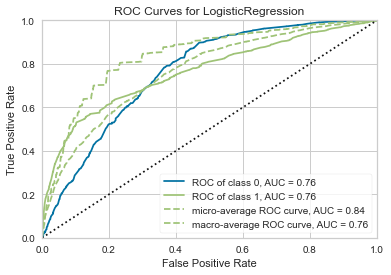

In [40]:
plot_model(lr, plot='auc')

In [41]:
lr_holdout_pred = predict_model(lr)

lr_proba = lr.predict_proba(s.X_test_transformed)
print(lr_proba)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7723,0.7631,0.6195,0.2765,0.3824,0.2670,0.2997


[[0.53394376 0.46605624]
 [0.20653756 0.79346244]
 [0.81409827 0.18590173]
 ...
 [0.95299218 0.04700782]
 [0.40433044 0.59566956]
 [0.53446958 0.46553042]]


In [42]:
svm = create_model('svm')

calibrated_svm = calibrate_model(svm, calibrate_fold=5)
evaluate_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7078,0.0000,0.5909,0.7710,0.6690,0.4155,0.4273
1,0.7462,0.0000,0.6475,0.8067,0.7184,0.4925,0.5023
2,0.7636,0.0000,0.6553,0.8364,0.7349,0.5272,0.5400
3,0.7601,0.0000,0.6866,0.8049,0.7410,0.5202,0.5259
4,0.7601,0.0000,0.6741,0.8141,0.7375,0.5202,0.5281
5,0.7556,0.0000,0.6875,0.7960,0.7378,0.5112,0.5161
6,0.7503,0.0000,0.6723,0.7968,0.7292,0.5007,0.5069
7,0.7468,0.0000,0.6480,0.8077,0.7191,0.4937,0.5036
8,0.7537,0.0000,0.6949,0.7875,0.7383,0.5073,0.5109


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6939,0.7474,0.6166,0.7292,0.6682,0.3878,0.3925
1,0.7400,0.8193,0.6753,0.7756,0.7220,0.4800,0.4840
2,0.7611,0.8411,0.6987,0.7982,0.7452,0.5222,0.5263
3,0.7584,0.8501,0.6948,0.7959,0.7419,0.5167,0.5209
4,0.7539,0.8413,0.6905,0.7906,0.7372,0.5077,0.5118
5,0.7539,0.8383,0.6887,0.7920,0.7367,0.5077,0.5121
6,0.7511,0.8361,0.6883,0.7873,0.7345,0.5023,0.5063
7,0.7453,0.8360,0.6648,0.7924,0.7230,0.4905,0.4970
8,0.7519,0.8367,0.7000,0.7812,0.7384,0.5038,0.5066


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
svm_holdout_pred = predict_model(svm)
svm_calibrated_holdout_pred = predict_model(calibrated_svm)


In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, n_estimators=150, random_state=420, n_jobs=-1)

rf = create_model(clf)

#calibrated_rf = calibrate_model(rf)

evaluate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6953,0.7676,0.6694,0.7058,0.6871,0.3905,0.3910
1,0.7218,0.8033,0.7288,0.7187,0.7237,0.4436,0.4437
2,0.7408,0.8148,0.7487,0.7369,0.7428,0.4815,0.4816
3,0.7511,0.8218,0.7546,0.7493,0.7519,0.5022,0.5023
4,0.7332,0.8146,0.7468,0.7269,0.7367,0.4663,0.4665
5,0.7369,0.8158,0.7449,0.7332,0.7390,0.4737,0.4738
6,0.7265,0.8082,0.7367,0.7221,0.7293,0.4530,0.4531
7,0.7458,0.8139,0.7332,0.7523,0.7426,0.4917,0.4919
8,0.7369,0.8177,0.7562,0.7281,0.7419,0.4737,0.4741


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf_holdout_pred = predict_model(rf)
rf_calibrated_holdout_pred = predict_model(calibrated_rf)

rf_proba = rf.predict_proba(s.X_test_transformed)
print(rf_proba)
rf_calibrated_proba = calibrated_rf.predict_proba(s.X_test_transformed)
print(rf_calibrated_proba)

plot_model(rf, plot = 'calibration')
plot_model(calibrated_rf, plot = 'calibration')